In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf

from keras import models
from keras import layers

# CNN

In [2]:
def MakeModel(class_names: list, conv_layers: list = [32], kernel_size: tuple = (3,3), strides: tuple = (1,1), pool_size: tuple = (2,2), layers: list = [], learning_rate: float = 0.001) -> tf.keras.Sequential:
    """
    Simple straight forward CNN model. this is just for simplicity and testing
    atm. I will make it more modular later once I know what we are doing

    Args:
        class_names: list of the classification names
        conv_layers: list of how many filters each convolutional layer should use
        layers: list with the sizes of each hidden layer
    
    Returns:
        `tf.keras.Sequential` - a constructed tf model
    """
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()
    # model.add(tf.keras.layers.Rescaling(1./255))
    for filter_count in conv_layers:
        model.add(tf.keras.layers.Conv2D(filter_count,3, activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    for layer_count in layers:
        model.add(tf.keras.layers.Dense(layer_count, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(len(class_names)))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

## Load Data

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


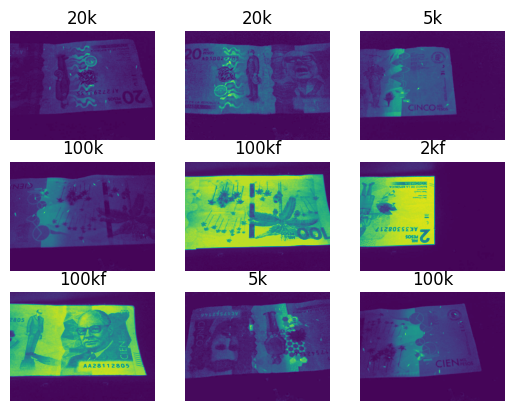

In [3]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(color="grayscale")
cf.PeakData(train_ds, class_names)

## Dry Run

In [4]:
model = MakeModel(class_names)
history = model.fit(
    train_ds.map(cf.AugmentImage(contrast=0.5)),
    validation_data=validation_ds.map(cf.AugmentImage(contrast=0.5)),
    epochs=5
)

Epoch 1/5
128/390 [========>.....................] - ETA: 26s - loss: 1948.9923 - accuracy: 0.2742

KeyboardInterrupt: 

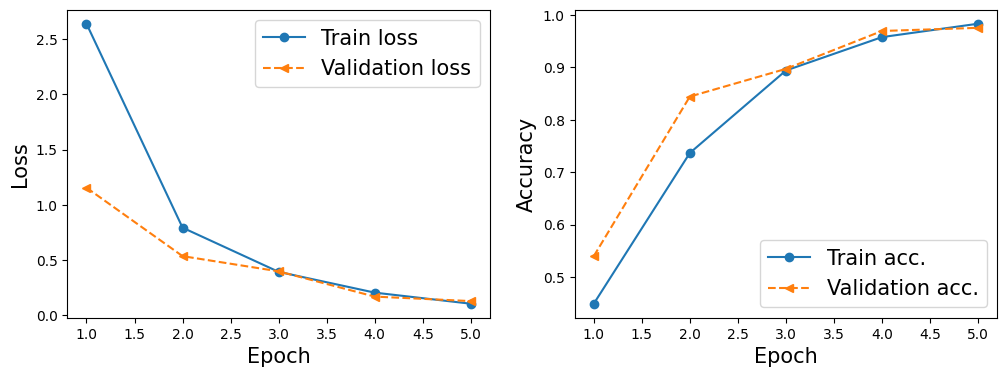

130/130 - 5s - loss: 0.1246 - accuracy: 0.9767 - 5s/epoch - 38ms/step
Test loss: 0.12463682889938354 | Test accuracy: 0.9766826629638672


(0.9835724234580994, 0.9757211804389954, 0.9766826629638672)

In [5]:
cf.EvaluateModel(model, test_ds.map(cf.AugmentImage(contrast=0.5)), history)

## Augmentation

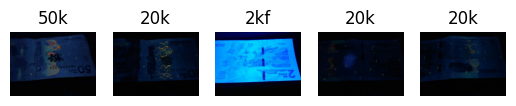

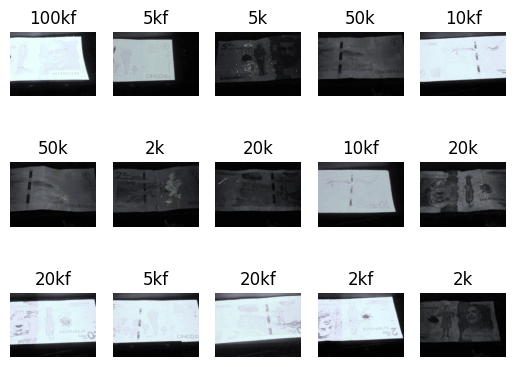

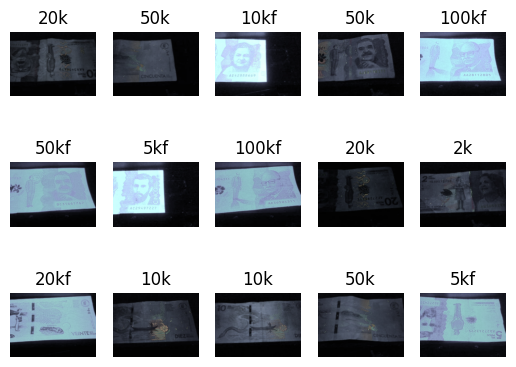

In [23]:
cf.PeakData(train_ds, class_names, 1, 5)
# print("brightness")
# cf.PeakData(train_ds.map(cf.AugmentImage(brightness=1)), class_names, 3, 5)
for i in range(1,5, 2):
    cf.PeakData(train_ds.map(cf.AugmentImage(saturation=i * 0.1)), class_names, 3,5)
# print("hue")
# cf.PeakData(train_ds.map(cf.AugmentImage(hue=-0.2)), class_names, 3, 5)

# Evaluation

We will test changing each of the following hyperparameters and see the results:

+ contrast
+ kernel size
+ strides
+ pool size
+ convolutional layers
+ hidden layers
+ learning rate

In [15]:
# for i, delta_setting in enumerate([3, (3,3), (2,2), (3,3), [64, 128], [2048], 0.01]):
settings = [1, (3,3), (1,1), (2,2), [32], [], 0.001]
# settings[i] = delta_setting
contrast, kernel_size, strides, pool_size, conv_layers, layers, learning_rate = settings

print(f"============== {settings} ==============")
model = MakeModel(
    class_names,
    conv_layers=conv_layers,
    kernel_size=3,
    strides=strides,
    pool_size=pool_size,
    layers=layers,
    learning_rate=learning_rate
)
history = model.fit(
    train_ds.map(cf.AugmentImage(contrast=contrast)),
    validation_data=validation_ds.map(cf.AugmentImage(contrast=contrast)),
    epochs=5
)
cf.EvaluateModel(model, test_ds.map(cf.AugmentImage(contrast=contrast)), history)
    

============== [1, (3, 3), (1, 1), (2, 2), [32], [], 0.001] ==============
Epoch 1/5


ResourceExhaustedError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/backend.py", line 2100, in random_uniform
        return tf.random.stateless_uniform(

    ResourceExhaustedError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[2439712,13] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 480, 640, 1), dtype=float32)
      • training=True
      • mask=None
